# TD 1 : Introduction à R et aux Statistiques descriptives


Christelle Gonindard

## 0. Fondements épistémologiques des statistiques
(qui, j'espère, vous aideront à en comprendre la logique générale)

La majeure partie des statistiques repose sur le concept de **Généralisation empirique** (Vladimir Vernadsky, 1926).
En une phrase : si les mêmes causes ont les mêmes effets, alors des conditions similaires doivent généralement générer les mêmes causes (inconnues), et donc permettre d'observer les mêmes phénomènes.

Ceci peut permettre d'utiliser un phénomène sans même le comprendre. Par exemple, on peut utiliser un médicament dont on a observé le bénéfice sans comprendre son mode d'action.

Ce courant épistémologique apporte donc la réponse suivante à la question "comment on sait ce que l'on sait ?" : <br>
$\textrm{quelques observations | une intuition | déduction logique de notre compréhension du monde}$ <br>
$\longrightarrow \textrm{hypothèses}$ <br>
$\longrightarrow \textrm{expériences}$ 

Concordance entre nos représentations du monde et observations.
Une non-concordance constitue une découverte

**La réfutabilité de Karl Popper** <br>
On ne peut pas montrer qu'une hypothèse est vraie, mais on peut montrer qu'elle est fausse :  <br>
Si des observations sont concordantes avec une hypothèse $H_a$, cela ne démontre pas qu'elle est vraie, car il pourrait y avoir d'autres hypothèses, auxquelles on aurait pu ne pas penser, qui seraient, elles aussi, compatibles avec les observations. <br>
Par contre, si une hypothèse $H_b$ n'est pas concordante avec les observations, alors c'est qu'elle est, en tout ou partie, fausse.

Ainsi, selon Karl Popper, la connaissance avance en générant des hypothèses qui sont ensuite testées via des expériences qui "mettent l'hypothèse en danger", qui sont susceptibles de la réfuter.

Le critère de réfutabilité d'une hypothèse de Karl Popper est encore couramment utilisé pour déterminer si une hypothèse est scientifique ou non.

<span style="color:gray">
Si ces questions d'épistémologie vous intéressent, vous trouverez de nombreuses ressources sur internet ou en bibliothèque, mais je trouve cette conférence très abordable et intéressante :</span> <br>

[lien](https://www.youtube.com/watch?v=EdLrXHFk2nM)

Le critère de réfutabilité est lui-même critiqué (par ex : [lien](https://fr.wikipedia.org/wiki/Contre_la_m%C3%A9thode))

**Pour en revenir aux statistiques**, bien souvent, la répétabilité est loin d'être parfaite. Utiliser des "conditions similaires" ne permet que de contrôler une partie des causes d'un phénomène, et pas toujours parfaitement.

Dans ces situations finalement très fréquentes,
- Comment peut-on utiliser la généralisation empirique ?
- Comment peut-on réfuter une hypothèse si seulement une partie des observations est contradictoire avec celle-ci ?

C'est pour rationaliser la réponse à ce type de question que l'on a besoin des statistiques. La réponse devient probabiliste : Les statistiques nous donne un risque de nous tromper en rejetant une hypothèse.


## 1. Introduction

### 1.1 Présentation des attentes des cours et TDs de cette année

Ces Cours-TD sont destinés à vous apporter le recul nécessaire à l’interprétation des analyses statistiques que vous serez amenés à évaluer au cours de votre cursus et de votre vie professionnelle. Le plus important est de comprendre le *principe* de l’analyse utilisée et à se faire sa propre opinion sur une analyse statistique afin de démêler le vrai du faux. Le but n’est pas de faire de vous des statisticiens qui vont développer de nouvelles méthodes, mais que vous soyez capables de comprendre et de détecter les erreurs et biais potentiels qui peuvent entrainer une mauvaise interprétation des données et des conclusions erronées.


### 1.2 Contexte

Comme il est décrit dans le cours, il est important de prendre conscience que les statistiques sont liées au domaine médical. Elles ont trouvé réellement leur essor et participé aux améliorations médicales à partir du moment où l’on a essayé de comprendre les causes des maladies, de la propagation d’une épidémie... 

Vous trouverez ci-dessous une liste non exhaustive de domaines
d’application des statistiques en pharmacie :
- Lors de la mise au point d’un nouveau médicament, trois étapes de vérification doivent être respectées :
1. Est-ce que le nouveau médicament n’est pas toxique pour l’homme ?
2. Est-ce que le nouveau médicament est efficace ?
3. Est-ce que le nouveau médicament est plus efficace que les traitements existants ?
- Lors de la mise au point d’un nouveau test diagnostique, d’une nouvelle méthode d’analyse, les questions qui suivent sont posées :
1. Est-ce que le nouveau test diagnostique fait mieux que le simple hasard pour donner un résultat positif à un patient réellement malade ?
2. Est-ce que la nouvelle méthode d’analyse fait aussi bien que la précédente ?
3. Est-ce que le nouveau test diagnostique améliore la sensibilité (capacité à donner un résultat positif à une personne réellement malade) ?
- Lors d’une étude épidémiologique, les questions qui suivent sont posées :
1. Est-ce que l’exposition à un facteur a un effet sur la survenue de la maladie ?
2. Est-il possible de prédire le risque de survenue de la maladie à la suite d’une exposition à ce facteur ?
3. Étudier l’impact d’un traitement sur le décès à 30 jours de patients, toutes choses égales par ailleurs.
- Lors de l’évaluation de la qualité et du contrôle d’une ligne de production
- Lors de l’évaluation des moyens et de l’état de santé d’une population : causes de décès, morbidité, surveillance sanitaire…

En conclusion, en biologie ou en santé, les domaines d’application sont très vastes : essais
cliniques randomisées, études épidémiologiques, dynamiques des populations, études omiques
(génomique, protéomique, transcriptomique...), lignes de production… Ces études représentent
une masse de données considérable à traiter. Il est donc loin le temps où les calculs statistiques
étaient fait à la main, sur de petits échantillons. Il est nécessaire pour traiter les données d’utiliser
des logiciels informatiques. Ce qu’il est important de retenir pour cette UE, c’est qu’il est .très
complet dans la mesure où pour analyser et interpréter une étude médicale, il faut :
- maitriser les connaissances médicales pour comprendre les données et interpréter les résultats 
- comprendre les principes des différentes méthodes statistiques pour savoir laquelle utiliser en fonction des échantillons et des questions qui sont posées
- maitriser un minimum l’outil informatique, car les données à traiter deviennent tellement importantes qu’il est illusoire de vouloir faire les calculs à la main.

#### Exemple :

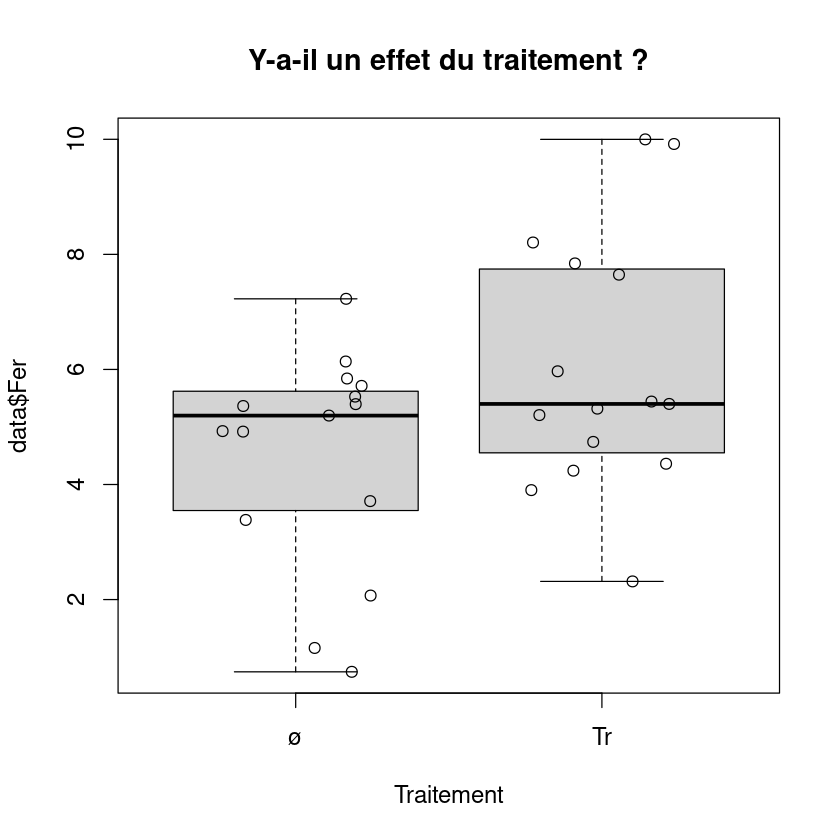

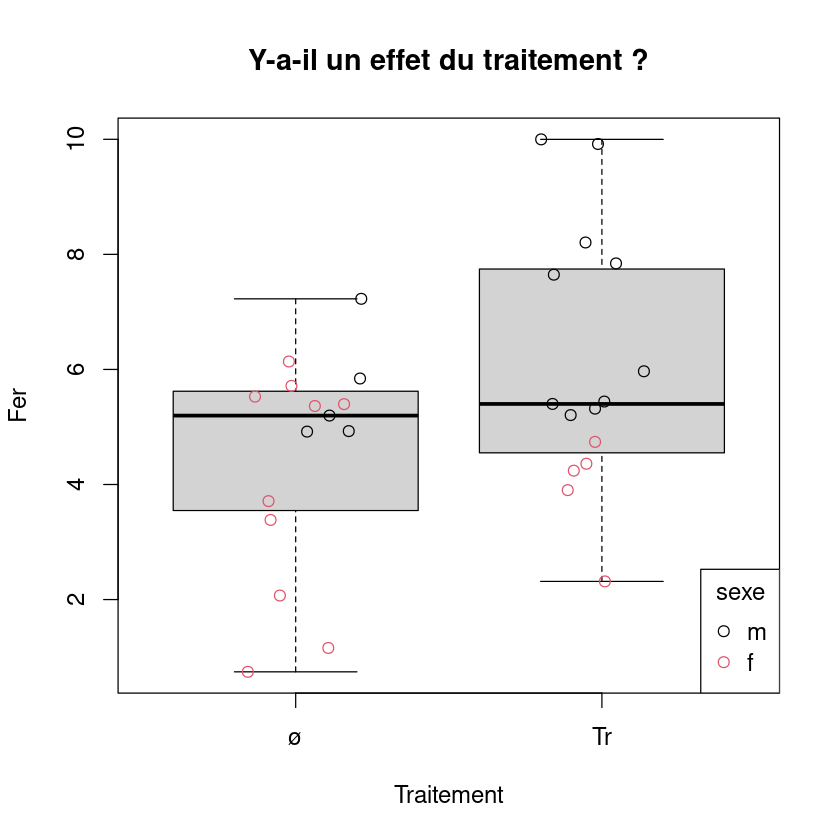

In [1]:
set.seed(5)
data = data.frame( `Fer`      = c(rnorm(5,2),rnorm(10,6), rnorm(10,4.5),rnorm(5,8.5))
                  ,`sexe`     = c(rep('f',10), rep('m',5), rep('f',5),rep('m',10))
                  ,`Traitment`= c(rep('ø',15), rep('Tr',15)))
par(cex=1.2)
boxplot(data$Fer ~ data$Traitment, main = 'Y-a-il un effet du traitement ?', xlab = 'Traitement')
points(data$Fer ~ I((data$Traitment=='Tr')+1 + runif(30,-0.25, 0.25)) )
boxplot(data$Fer ~ data$Traitment, main = 'Y-a-il un effet du traitement ?', pch=NA, ylab='Fer', xlab = 'Traitement')
points(data$Fer ~ I((data$Traitment=='Tr')+1 + runif(30,-0.25, 0.25)), col=(data$sexe=='f')+1)
legend(x= 'bottomright', legend = c('m','f'), col=1:2, title = 'sexe', pch=1)
# anova(lm(Fer ~ Traitment * sexe, data = data))

Cet exemple illustre un point crucial pour les analyses statistiques.
La non-prise en compte de ce point est probablement la principale source d'erreur dans les analyses statistiques : 
Les observations doivent être 1. **indépendantes**, et 2. **identiquement distribuées**.
1. Observations indépendantes : <br>
   Dans un groupe, les individus sont indépendants si le fait de connaitre la valeur de la variable pour un individu du groupe ne nous informe en rien sur les autres individus. Exemple de données non indépendantes : on étudie le nombre de grains de beauté sur les habitant⋅e⋅s d'un quartier. Le fait d'observer qu'une personne a beaucoup de grains de beauté nous informe sur le fait que les membres de sa famille risquent d'en avoir, eux-mêmes, plus que la moyenne du quartier. Les membres d'une même famille ne sont pas indépendants les uns des autres. <br>
   Dans le graphique ci-dessus, les membres d'un même genre (m/f) ne sont pas indépendants les un des autres. <br>
   La non-indépendance est liée au fait que des individus partagent une valeur proche ou identique pour une variable dite *confondante* qui impacte la variable d'intérêt qui est étudiée.

3. observations identiquement distribuées : <br>
Les observations proviennent toutes de la même population, qui peut être décrite par une distribution donnée. En d'autre terme, les valeurs observées sur différents individus résultent des mêmes phénomènes sous-jacents.

En abrégé, on dit que des données **i**ndépendantes et **i**dentiquement **d**istribuées sont `i.i.d.`.

**Même si ce n'est pas toujours mentionné, <u>tous</u> les intervalles de confiances et les tests statistiques font l'hypothèse que les données sont i.i.d.**

Lorsque les données ne sont pas indépendantes, il existe différentes approches pour prendre en compte la structure de dépendance entre les données. La plupart dépassent le cadre de ces cours, mais l'analyse de données appariées que nous verrons est une de ces méthodes. Dans ces cours, vous devrez notamment chercher à savoir si les données sont i.i.d. ou non.

## 2. Présentation des données


**Objectif de la séance**

**À partir d’un jeu de données proposé et de la problématique biologique soulevée, il s’agit de
décrire l’échantillon, étape primordiale avant toute analyse statistique et qui permettra de vous
initier au langage R.**



Un clinicien évalue l’intensité de la dépression sur l’échelle d'Hamilton qui varie de 0 (non
déprimé) à 56 (très déprimé), chez 100 patients souffrant d’un Épisode Dépressif Majeur (EDM).
On veut savoir si l’acupuncture améliore l’évolution de la dépression. Pour cela, 100 malades
de même état dépressif (même score d'Hamilton) sont répartis en 2 groupes de 50 par tirage
au sort. Le groupe I a reçu uniquement le traitement pharmacologique et le groupe II a reçu le
traitement pharmacologique associé à de l’acuponcture.
Le jeu de données contient les variables suivantes :
- Hamilton_G1 : Les scores d'Hamilton, après 8 mois de traitement pour le groupe 1
- Hamilton_G2 : Les scores d'Hamilton, après 8 mois de traitement pour le groupe 2
- Age_G1 : l’âge des patients du groupe 1
- Age_G2 : l’âge des patients du groupe 2
- poids_G1 : le poids des patients du groupe 1
- poids_G2 : le poids des patients du groupe 2
- sexe_G1 : le sexe des patients du groupe 1
- sexe_G2 : le sexe des patients du groupe 2
- Urbanisation_G1 : le niveau d’urbanisation dans lequel vivent les patients du groupe 1 (A : rural, B : urbanisation modérée, C : fortement urbanisé)
- Urbanisation_G2 : le niveau d’urbanisation dans lequel vivent les patients du groupe 2 (A : rural, B : urbanisation modérée, C : fortement urbanisé)

Les données sont contenues dans le fichier texte : `data_Depression.txt`

La lecture des données se fait à partir de la fonction *read.table* de *R* :


Afin de faire exécuter votre instruction, il suffit de cliquer sur la touche **Exécuter** ou de faire "ctrl+entrée"

In [2]:
# L'argument h=T qui signifie header est vraie permet de préciser que le fichier de données 
# possède une ligne en début qui correspond au nom des colonnes

data_depression = read.table("data/data_Depression.txt", h=T)

Une table peut contenir plusieurs milliers de lignes, tout afficher peut donc être inutile.

La fonction `head()` permet d'afficher les premières lignes d'une table.

In [ ]:
# Affichez le début du tableau
head(data_depression)
# Affichez la fin du tableau
tail(data_depression)


En **R**, un ensemble à une dimension s'appelle un vecteur, par exemple une colonne d'une table est un vecteur. 

In [ ]:
# Pour avoir accès aux colonnes, il faut préciser les noms du tableau et de la colonne
data_depression$Hamilton_G1

## 3. Statistique descriptive

La statistique descriptive est la première étape primordiale lors d’une analyse statistique, cette étape va permettre bien évidemment de résumer ou représenter les données observées, avec le moins de mots, chiffres ou graphiques possible, grâce à des outils statistiques simples tels que la moyenne, la médiane, la variance, les quantiles, le maximum, le minimum…
Elle permet également de vérifier s'il n’y a pas de valeurs aberrantes, de problèmes d’échantillonnage.

Elle a aussi un rôle de suggestion d’hypothèses qui pourront être testées par l'acquisition de nouvelles données ou encore de vérification de condition d’application pour les tests statistiques de l’étude inférentielle qui suivra, mais qui doit généralement avoir été planifié avant l'acquisition des données.

#### 3.1 Les variables aléatoires

Les variables du jeu de données peuvent prendre un certain nombre de valeurs ou de modalités qui ne sont pas choisies par la ou le scientifique, mais observées ou constatées et enregistrées. C’est pour cela qu’elle se nomme variable aléatoire. Il existe deux types de variables aléatoires :
- Variable *qualitative* : modalité non mesurable, par exemple la couleur des yeux, le sexe, le groupe sanguin...
- Variable *quantitative* : modalité mesurable, par exemple la taille, le taux d’hormones…

Une variable aléatoire quantitative est dite *discrète* si elle prend que des valeurs discontinues, comme par exemple le nombre d’enfants dans une famille, le nombre de fumeurs...

Une variable aléatoire quantitative est dite *continue* si elle prend toutes les valeurs dans un intervalle donné,
comme par exemple : la taille, le poids...

Dans notre exemple de cours, les variables Hamilton, Age, Poids sont des variables quantitatives alors que les variables Sexe et Urbanisation sont des variables qualitatives.

#### 3.2 Paramètres les plus couramment utilisés en statistique descriptive

Lors de la description d’un jeu de données, deux types de paramètres doivent être utilisés pour décrire les variables quantitatives : les paramètres de position et les paramètres de dispersion.

**Les paramètres de position**

1. la **moyenne** : c’est la somme pondérée des valeurs mesurées 
2. la **médiane** : c’est la valeur qui scinde l’échantillon en deux de telle sorte que 50% des observations sont supérieures à cette valeur et 50% des observations lui sont inférieures.

Comparaison de ces deux indicateurs :

1. la **moyenne** : c’est l’indicateur familier, intuitif et facile à calculer. Son point faible : il n’est pas robuste (il est très sensible au changement d’une ou plusieurs observations, aux valeurs extrêmes...)
2. la **médiane** : c’est un indicateur à fois précis et robuste (il est peu sensible à la modification d’une ou plusieurs observations ou valeurs extrêmes…)

Remarque : tout au long des TDs, vous trouverez dans les encadrés les instructions en langage R pour réaliser les analyses statistiques.

*Application au jeu de données sur le score d'Hamilton :*

In [ ]:
# Traitement pharmacologique
# Moyenne de la variable Hamilton_G1
mean(data_depression$Hamilton_G1)

# Médiane de la variable Hamilton_G1
median(data_depression$Hamilton_G1)

*Application* : calculez les moyennes et médianes des variables Hamilton_G2, Age_G1, Age_G2

On constate que l’âge moyen dans les groupes 1 et 2 sont proches, respectivement environ 40 ans et 37 ans. En revanche, la différence au niveau du score d'Hamilton semble plus importante entre le groupe 1 et 2 avec des scores moyens respectivement de 38.8 et 24.5, et des scores médians respectivement de 40 et 25. Toutefois, il est important de vérifier la dispersion des données. En effet, même si la différence de moyenne entre les deux groupes peut sembler importante, cette différence ne signifie pas la même chose selon que, dans les deux groupes, la dispersion autours de la moyenne soit forte où faible : 

Plus dans chacun des groupes, la dispersion autours de la moyenne est élevée, plus il devient plausible que la différence observée entre les moyennes des deux groupes soient un simple *effet d'échantillonnage*.

<img src="Figures/Fig_dispersion.jpg" />

**Les paramètres de dispersion :**

Ils quantifient la variabilité des mesures par rapport à un paramètre de position.
1. l’amplitude : c’est l’écart entre la plus grande et la plus petite valeur observée dans l’échantillon.
2. l’intervalle inter-quartile : c’est la distance (différence) entre le 1er quartile et le 3ème quartile (respectivement Q1 et Q3). Les quartiles sont définis sur le même principe que la médiane qui est aussi nommée 2ème quartile.<br>
**Q1** : c’est la valeur qui scinde l’échantillon en deux de telle sorte que 75% des observations
sont supérieures à cette valeur et 25% des observations lui sont inférieures.<br>
**Q3** : c’est la valeur qui scinde l’échantillon en deux de telle sorte que 25% des observations
sont supérieures à cette valeur et 75% des observations lui sont inférieures.<br> 
L'inter-quartile contient 50% des observations : si on trie les données du minimum au maximum, il contient les 25% de part et d’autre de la médiane.
3. la variance : c’est la distance moyenne entre les données et la moyenne de ces mêmes données, la distance étant mesurée via le *carré de la différence*, l'écart-type correspond à la racine carré de la variance <br>

Population $X$ de taille $N$ : 
$$Var(X) = \sigma^2 = \frac{\sum_{i=1}^N[(x_i-\mu_X)^2]}{N} $$
$$ \approx $$

Échantillon $x$ de taille $n$ issu de la population $X$: 
$$\hat{Var(X)} = \hat{\sigma}^2 = \frac{\sum_{i=1}^n[(x_i-\hat{\mu}_X)^2]}{n-1} \neq Var(x)$$
avec $\hat{\mu}_X = \mu_x$, $x$ étant un échantillon de taille $n$ de la population $X$ de taille $N$.


Comparaison de ces trois indicateurs :
1. l’écart-type : c’est un indicateur peu robuste, mais facile à calculer et récurrent dans les statistiques inférentielles
2. l’intervalle inter-quartile : c’est un indicateur robuste au même titre que les valeurs qui le caractérisent (quartiles).
3. l’amplitude : facile à calculer, mais très sensible aux valeurs aberrantes (qui sont des valeurs extrêmes en général).

**<span style="color:red">
<u>/!\\/!\\/!\\</u> On distingue la variance (et l'écart-type) de la population de la variance (et l'écart-type) de l'échantillon <u>/!\\/!\\/!\\</u>
</span>**

Nous mettons ici le doigt sur un des principaux concepts des statistiques, et un des plus mal compris… : Les <span style="color:darkgreen"><u>**degrés de liberté**</u></span> <br>

1.**Intuition 1** : <br>
Étudiez qualitativement la moyenne et la variabilité de ces 2 couples d'échantillons :

$n$| Échantillons | Moyenne | Variance
 --- |--- | --- | --- 
$2$ | $\{1; 2\}$ *vs* $\{1; 4\}$ | ??? | ???
$1$ | $\{0\}$ *vs* $\{13\}$ | ??? | <img src="Figures/trollface.png" alt="drawing" width="40"/> 

On voit qu'une seule valeur nous informe un peu sur la moyenne alors qu'elle ne nous informe pas du tout sur la variance.

2. **Intuition 2** :<br>
Considérez la *population* $\{5; 4; 6; 0; 5; 4; 6; 8; 9; 3; 4; 2; 8; 5; 9\}$ de taille $N=15$. Sa moyenne est $\mu=5.2$, et sa variance $\sigma^2 = 6.16$. <br>
- Prélevez un échantillon de taille $n=2$ pour estimer la variabilité de la population.
- Si on utilise un échantillon, en règle générale, c'est que l'on n'a pas accès à la population.
- Donc pour étudier la variabilité de la population, on va dans un premier temps *estimer* la moyenne de la population ($\hat{\mu}$) pour ensuite *estimer* la distance moyenne à cette valeur.
- **Du fait que $\hat{\mu}$ est estimé à partir de l'échantillon, sa valeur sera <u>toujours</u> plus proche de l'échantillon que la valeur réelle $\mu$.**
- Ainsi, la distance entre les données de l'échantillon et $\hat{\mu}$ est toujours plus faible que la distance avec $\mu$.
- Et ce, d'autant plus que $\hat{\mu}$ est peu précis, éloigné de $\mu$. Or, en moyenne, l'imprécision est d'autant plus grande que la taille de l'échantillon est petite (ex : $n=2$). C'est pour cette raison qu'il faut corriger pour la taille de l'échantillon.
- Ce problème serait différent (opposé) si on utilisait 2 échantillons de taille $n=2$, l'un pour calculer $\hat{\mu}$, et l'autre pour calculer la distance à cette estimation.
- **Autrement dit, le problème vient du fait qu'on utilise deux fois les données, pour calculer $\hat{\mu}$ puis pour calculer la distance à cette estimation.**
- **Cela revient à prendre en compte la distance entre une donnée et elle-même, et ce pour chaque observation.**
- **Plus l'échantillon est petit, plus ces distances entre une donnée et elle-même pèsent lors de l'estimation**

3. **Définitions formelles** :
- Le nombre de paramètres d'un système (ex : une équation) qui peuvent varier indépendamment. Par exemple, un point dans un plan a 2 degrés de liberté.
- Le nombre de variables aléatoires qui ne peuvent être déterminées ou fixées par une équation.
- Quantité d'information utilisée pour calculer des paramètres (ici la moyenne) qui sont utilisées pour l'estimation. Cette information utilisée pour calculer les paramètres n'est plus disponible pour l'estimation.
- (Ma préférée) Le nombre d'observations moins le nombre de "relations nécessaires" entre ces observations \[dans l'équation\].
  
4. **Intuition 3** : mettez en relation la formule et la définition :<br>
$$\hat{\sigma}^2 = \frac{\sum_{i=1}^n[(x_i-\hat{\mu}_X)^2]}{n-1}$$
Si on connait toutes les $n$ valeurs de l'échantillon, sauf une, et la moyenne de l'échantillon $\hat{\mu}$, alors on peut déduire la valeur manquante. Cette valeur manquante ne peut pas varier librement, elle est fixée. <br>
Autrement-dit, elle est présente deux fois dans l'équation, dans $x_i$, et dans $\hat{\mu}$ : <br>
Il y a une redondance dans l'information contenue dans l'équation. On a l'ensemble des $\{x_1, \dots, x_i, \dots, x_n\}$, et leur moyenne $\hat{\mu}$, on peut perdre une de ces valeurs et la déduire des autres.

5. Une autre explication de la même intuition : [https://www.youtube.com/watch?v=9ONRMymR2Eg](https://www.youtube.com/watch?v=9ONRMymR2Eg)

6. La démonstration mathématique que $s_x^2$ est un estimateur biaisé de $\sigma_X^2$ ($E(s_x^2) \neq \sigma_X^2$), et que ce biais est corrigé par le $n-1$ : [https://www.youtube.com/watch?v=D1hgiAla3KI](https://www.youtube.com/watch?v=D1hgiAla3KI) <br>
   Une des étapes de cette démonstration fait référence au fait que $Var(\hat{\mu}) = \frac{\sigma^2}{n}$, et donc à cette vidéo [https://www.youtube.com/watch?v=7mYDHbrLEQo](https://www.youtube.com/watch?v=7mYDHbrLEQo).

**En pratique, il est rare de disposer de toute la population à laquelle on s'intéresse, et tout l'art des statistiques est d'inférer des propriétés de la population en utilisant un échantillon de celle-ci. On utilise donc à peu près toujours la formule dédiée à quantifier la variabilité dans la population via un échantillon de celle-ci.**

Les *degrés de liberté* peuvent aussi être vus comme une estimation de la puissance que pourra avoir un test statistique étant donné la taille du jeu de données étudié.

(`Prenez toujours soin de vos degrés de liberté, et peut-être plus encore de ceux des autres !`)

*Application au jeu de données sur le score d'Hamilton :*

In [1]:
# Moyenne de la variable Hamilton_G1

# Médiane de la variable Hamilton_G1

# Ecart-type de la variable Hamilton_G1

# Résumé statitistique de la variable Hamilton_G1


Calculez la moyenne, la médiane, l'écart-type et le résumé statistique de la variable Hamilton_G2 et comparez aux résultats obtenus pour la variable Hamilton_G1

In [2]:
# Moyenne de la variable Hamilton_G2

# Médiane de la variable Hamilton_G2

# Ecart-type de la variable Hamilton_G2

# Résumé statitistique de la variable Hamilton_G2


**En conclusion** : Les deux résumés statistiques des scores d'Hamilton pour les groupes G1 et G2 montrent une non-superposition des deux groupes : le groupe 1 a des scores d'Hamilton sensiblement plus forts que le groupe 2. Ainsi, dans le groupe 2, 75% des données sont inférieures à 28 alors que dans le groupe 1, 75% des valeurs sont supérieures à 35.25.

*Il semblerait que le score d'Hamilton soit plus faible dans le groupe 2 que dans le groupe 1, ce qui irait dans le sens de dire que l’acuponcture apporte un effet bénéfique dans le traitement de la dépression.*
Le but de cette expérience était de tester cette hypothèse, ceci sera effectué dans les TDs suivants par un test de comparaison de moyennes.

#### 3.3 Représentation des variables quantitatives

**L'histogramme**

L’histogramme est un moyen rapide pour étudier la répartition d’une variable.
Cependant, il faut faire attention, car la forme de l’histogramme change en fonction de l’amplitude des classes, il faut tester plusieurs pas, c’est-à-dire, plusieurs découpages différents.

P. Besse : « La qualité de l’estimation d’une distribution par un histogramme dépend beaucoup du découpage en classes. Malheureusement, plutôt que de fournir des classes d’effectifs égaux et donc de mieux répartir l’imprécision, les logiciels utilisent des classes d’amplitudes égales et
tracent donc des histogrammes parfois peu représentatifs. »

Malgré ces limitations, les histogrammes sont bien plus informatifs sur la distribution d'une variable que les estimateurs ponctuels décrits précédemment (moyenne, médiane, variance et compagnie)

*Application au jeu de données sur le score d'Hamilton :*

In [ ]:
# tracez de l'histogramme représentant la variable Hamilton_G1
hist(data_depression$Hamilton_G1)

Tracez l'histogramme de la variable Hamilton_G2 et comparez avec l'histogramme de la variable Hamilton_G1

In [3]:
# tracez de l'histogramme représentant la variable Hamilton_G1


Ces histogrammes montrent une répartition dissymétrique du score d'Hamilton pour les groupes G1 et G2 avec un mode respectivement aux alentours de 40-45 et 25-30.

On peut choisir le nombre de classes de l’histogramme, ce qui permet d’augmenter (ou de réduire) la précision du graphique.

Retracez l'histogramme de la variable Hamilton_G2 avec n=15 observations par classes

In [4]:
# tracez de l'histogramme représentant la variable Hamilton_G1, en choisissant 15 classes grâce à l'argument n=15


Ces histogrammes ont été obtenus à partir des mêmes données que les histogrammes précédents, seul le nombre de classes a été changé. Les deux distributions semblent pourtant très différentes. Il est important d’ajuster le nombre de classes en fonction de la taille de l’échantillon.

**Le boxplot**

Ce graphique tout simple permet de résumer une variable de manière rapide et visuel, d’identifier les valeurs extrêmes, de comprendre la répartition des observations (dispersion, symétrie...) d’une variable ou encore de comparer la répartition des données d’une même variable entre plusieurs échantillons.

- La valeur centrale du graphique est la médiane (il existe autant de valeur supérieure qu’inférieures à cette valeur dans l’échantillon).
- Les bords du rectangle sont les quartiles (Pour le bord inférieur, un quart des observations ont des valeurs plus petites et trois quarts ont des valeurs plus grandes, le bord supérieur suit le même raisonnement).
On peut remarquer que 50% des observations se trouvent à l’intérieur de la boîte puisqu'elle représente l'espace interquartile.
- Les extrémités des moustaches sont calculées en utilisant 1.5 fois l’espace interquartile (la distance entre le 1er et le 3ème quartile) : s'il y a des valeurs qui vont au-delà de 1.5*(Q3-Q1), alors les extrémités des moustaches correspondent à 1.5*(Q3-Q1), sinon c'est juste le min ou le max.

Les valeurs à l’extérieur des moustaches sont représentées par des points. Ces valeurs peuvent être décrites comme extrêmes par rapport aux autres valeurs de l’échantillon. Toutefois, il ne faut pas faire de raccourci rapide et en déduire que ce sont forcément des valeurs aberrantes. Par contre, cela indique qu’il faut étudier plus en détail ces observations.

*Application au jeu de données sur le score d'Hamilton :*

In [ ]:
# l'argument main permet de préciser un titre
# l'argument ylab permet de préciser un titre à l'axe de y
boxplot(data_depression$Hamilton_G1,main="Groupe G1",ylab="Score Hamilton")

Tracez le boxplot de la variable Hamilton_G2

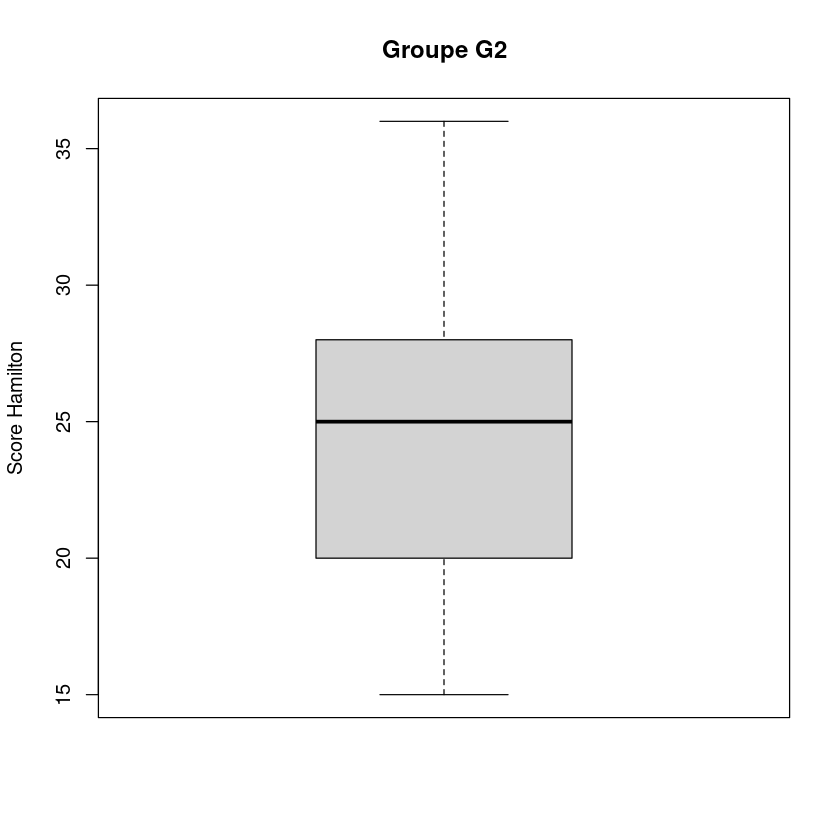

In [13]:
# l'argument main permet de préciser un titre
# l'argument ylab permet de préciser un titre à l'axe de y


Il est possible de regrouper les deux boxplots sur la même figure

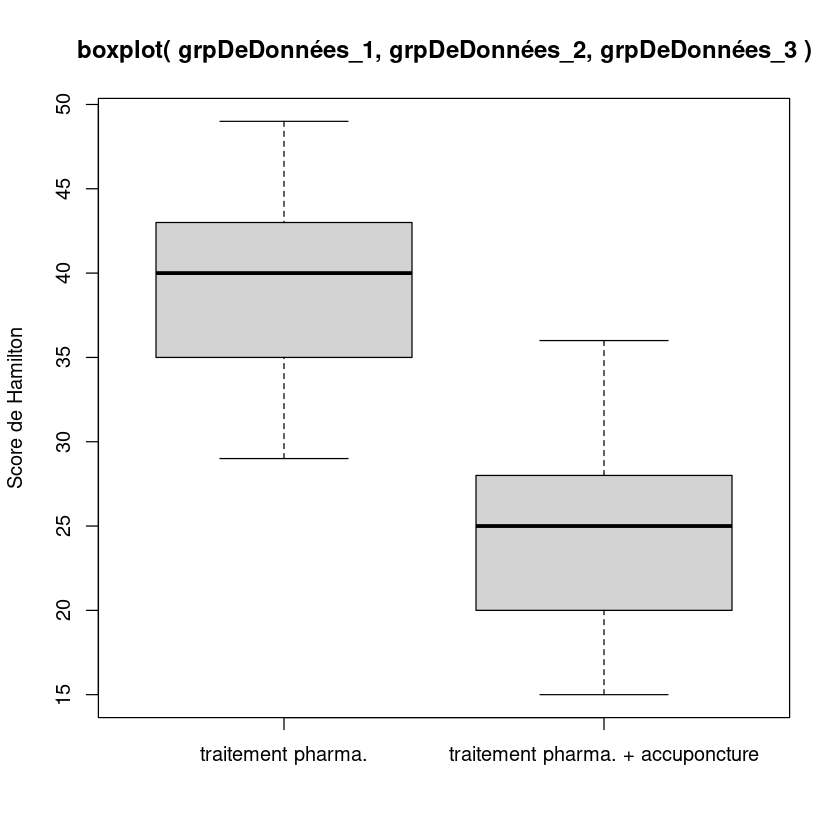

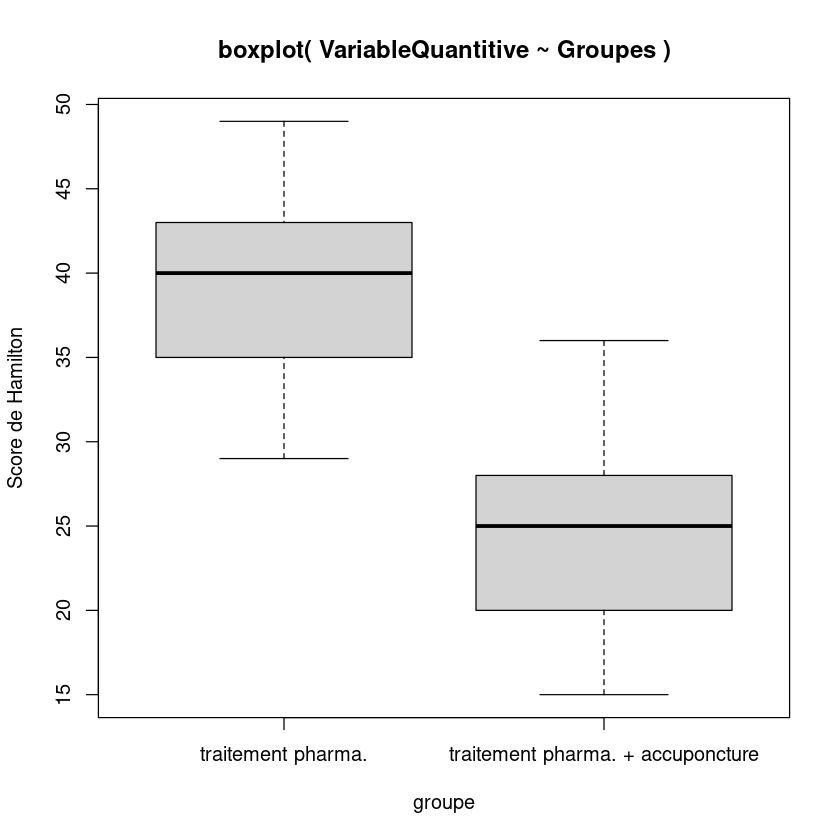

In [14]:
## Version 1 : le jeu de donnée est en format 'court'
boxplot(data_depression$Hamilton_G1 , data_depression$Hamilton_G2
        ,ylab="Score de Hamilton"
        ,names = c("traitement pharma.","traitement pharma. + accuponcture")
        ,main = "boxplot( grpDeDonnées_1, grpDeDonnées_2, grpDeDonnées_3 )")

## Version 2 : le jeu de donnée est en format 'long'
# Vecteurs contenant les scores Hamilton des deux groupes
Score_Hamilton = c(data_depression$Hamilton_G1,data_depression$Hamilton_G2)

# Vecteur contenant les informations concernant les groupes
groupe = c(rep("traitement pharma.",length(data_depression$Hamilton_G1))
           ,rep("traitement pharma. + accuponcture", length(data_depression$Hamilton_G2)))

# Tracé du boxplot
boxplot(Score_Hamilton~groupe,ylab="Score de Hamilton",
       main = "boxplot( VariableQuantitive ~ Groupes )")



Sur les boxplots ci-dessus, il est aisé de voir que le score d'Hamilton médian est supérieur dans le groupe qui n’a pas eu d’acupuncture. De plus, la répartition des scores entre les deux classes est également différente d’après ces boxplots, en effet, le troisième quartile du groupe ayant eu un complément avec de l’acupuncture est largement en dessous du premier quartile du
groupe qui n’a pas eu d’acupuncture. En d'autre terme, *il y a bien une grosse différence entre le "paquet de données" groupe 1 et le "paquet de données" groupe 2*.

Ces boxplots suggèrent que l’acupuncture aide au traitement de la dépression.
Cette hypothèse, qui est la raison pour laquelle on a réalisé l'expérience, va pouvoir être vérifiée statistiquement dans le chapitre suivant.

Il peut également être observé que dans les deux groupes la répartition des données apparait comme symétrique par rapport à la médiane, ce qui pourrait laisser entendre à la normalité des données (cette hypothèse sera étudiée plus tard).

#### 3.4 Représentation des variables qualitatives

La description d’une variable qualitative passe par la présentation de ces effectifs par classes.
Ceci conduit à la création d'une nouvelle variable "effectif". Quelle est la nature de cette nouvelle variable ?

In [15]:
# Quantitative discrète

*Application au jeu de données sur la variable Urbanisation_G1 :*

In [ ]:
# la fonction table compte les effectifs des modalités de la variable
effectif_urbanisation_G1 = table(data_depression$Urbanisation_G1)

# affichez le résultat
effectif_urbanisation_G1

Calculez les effectifs de la variable Urbanisation_G2 et commentez les résultats

In [5]:
# la fonction table compte les effectifs des modalités de la variable

# affichez le résultat


**Les barplots**

La hauteur des barres correspond soit à la fréquence d’observation de chacune des modalités
soit à l’effectif de la variable considérée. Contrairement aux histogrammes, les bâtons des diagrammes en barre sont bien séparés pour mettre l’accent sur le caractère discret des observations (par opposition à la contiguïté des barres d’un histogramme qui fait écho à la nature continue de
la variable).

*Application au jeu de données sur la variable Urbanisation_G1 :*

In [ ]:
barplot(effectif_urbanisation_G1,main="Répartition des effectifs au sein du groupe G1")

Tracez le barplot représentant les effectifs de la variable Urbanisation_G2 et commentez 

###### Au vu de ce graphique, deux observations peuvent être faites :
1. la classe "C" de très forte urbanisation a un effectif très faible pour le groupe G1 et nul pour le groupe G2. Ceci devra être pris en compte lorsque nous testerons si la répartition des effectifs diffère entre les deux groupes. Deux approches pourront alors être utilisées.
2. La répartition de l’urbanisation entre les deux groupes semble homogène d’après ce graphique.

**Les camemberts**

Le camembert permet de représenter les différentes modalités par des "morceaux de camembert" dont la surface est proportionnelle à la fréquence observée.
Ces représentations sont peu adaptées lorsque qu'il y a beaucoup de modalités à représenter, ou que les fréquences sont très inégales (ex : 90%, 8%, et 5 autres modalités dans les 2% restant). Ces 5 autres modalités restantes seront mal représentées.

*Application au jeu de données sur la variable Urbanisation_G1 :*

In [ ]:
pie(effectif_urbanisation_G1,main="Répartition des effectifs au sein du groupe G1")

Tracez le camembert représentant les effectifs de la variable Urbanisation_G2 et commentez 

## 4. Manipulation de données

###  4.1 Extraction d'une valeur d'un tableau

Il est possible avec **R** d’extraire des valeurs particulières d’un tableau (*data.frame*). Pour cela, il faut être conscient qu’un tableau est composé de lignes et de colonnes, chaque
valeur du tableau a donc un numéro de ligne *i* et un numéro de colonne *j*. 

Pour extraire une valeur particulière du tableau, il suffit de préciser à **R** son numéro de ligne et de colonne. Par
exemple, nous allons extraire la valeur de la ligne 2 en colonne 3 :

In [ ]:
# Extraire la valeur de la ligne 2 en colonne 3
# les [] permettent d'extraire une sous partie du tableau
# ce qui est avant la virgule correspond aux lignes et ce qui est après la virgule correspond aux colonnes
data_depression[2,3]

* Entrainement : Extraire la valeur du tableau qui se situe en ligne 15 et colonne 4 :*

Avant d'aller plus loin dans les extractions de sous tableaux, il est important de bien faire la différence entre `=` et le `==`

Lorsque l’on met un `=` nous attribuons une valeur, par exemple ici, nous allons attribuer la
valeur 4 à toto :

In [ ]:
# si on tape juste toto, R met un message d'erreur car la variable toto est n'est pas définie :
toto

# le = permet de créer une variable, et de lui affecter une valeur
toto=4
toto

Lorsque nous mettons un **==**, nous réalisons un test.

Par exemple, on peut tester si toto est égale à 9 :

In [ ]:
toto==9

**R** nous répond faux.

**Remarque** : Pour tester si une valeur est différente, il faut utiliser **!=**.

On peut par exemple tester si toto est $\neq$ 9

In [ ]:
toto != 9

**R** nous répond vrai.

### 4.2 Extraction de sous tableau en fonction de conditions

**i) Sélection de données au sein d'une colonne** 

Il est également possible d’extraire des sous groupes de données au sein d'une colonne. Par exemple, à partir de notre tableau de données, nous pouvons extraire parmi la colonne scores d'Hamilton du groupe G1, uniquement le score des hommes. 
Nous appellerons ce nouveau groupe : hamilton_G1_homme.

Le principe est le suivant :
- On sélectionne la colonne qui nous intéresse, ici, il s’agit de Hamilton_G1
- Seul le score des hommes nous intéresse, il est donc nécessaire de préciser à **R** qu'au sein de cette colonne, nous ne garderons que les lignes correspondantes aux hommes

In [ ]:
data_depression$sexe_G1=="H"

hamilton_G1_homme = data_depression$Hamilton_G1[ data_depression$sexe_G1=="H" ]
hamilton_G1_homme

In [ ]:
# /!\ R recycle les index ce qui est source d'erreur : 
data_depression$Hamilton_G1[ c(T,F,T) ]
# Or, nous aurions voulu :
data_depression$Hamilton_G1[ c(1,3) ]


*Entraînement : Extraire le score de Hamilton du groupe G2 qui se situe dans une
zone urbanisée A*

**ii) Sélection d'un sous tableau** 

Il est également possible d’extraire un sous tableau de données. Nous allons par exemple
extraire le tableau de données qui est associé aux données du groupe G1, nous l’appellerons
data_G1. 

Le principe est le suivant :
- Repérez les colonnes qui sont associées aux groupes G1 : 1, 3, 5, 7 et 9.
- Ensuite, nous voulons récupérer toutes les lignes

In [ ]:
# ce qui est avant la virgule correspond aux lignes et ce qui est après la virgule correspond aux colonnes
# nous ne précisons rien pour les lignes, car nous les voulons toutes
# pour les colonnes, nous précisons les valeurs souhaitées
data_G1 = data_depression[,c(1, 3, 5, 7, 9)]

# affichons le début du nouveau tableau
head(data_G1)

*Application : Extraire un nouveau tableau nommé data_G2, qui contient uniquement les colonnes associées au groupe G2

Exemple d’application : À partir du tableau data_G1, nous allons sélectionner un nouveau
tableau qui ne contient que le résultat des femmes. Le principe est le suivant :
- Nous ne gardons que les lignes où la valeur "F" apparaît dans la colonne sexe_G1 
- Puis nous gardons l'ensemble des colonnes

In [ ]:
data_G1_femme = data_G1[data_G1$sexe_G1=="F",]

head(data_G1_femme) # affiche les premières lignes d'un tableau de données

Extraire un tableau `data_G2_femme` qui ne contient que les informations concernant les femmes du groupe G2

**Remarque** : Il est possible de combiner plusieurs conditions lorsque l'on extrait des données d'un tableau grâce aux instructions :
- **&** qui signifie "et" : par exemple, on veut extraire du tableau les données concernant les femmes de plus de 40 ans (ce qui se traduit par  "être une femme et avoir plus de 40 ans")
- **|** qui signifie "ou" : par exemple, on veut extraire du tableau les données concernant, soit les femmes, soit les personnes de plus de 40 ans. La différence avec le tableau précédent est qu'il sera possible dans ce tableau d'avoir également des hommes de plus de 40 ans

*Appliquez ces deux conditions au tableau data_G1*

In [ ]:
# tableau les données G1 concernant les femmes de plus de 40 ans

# tableau les données G1 concernant soit les femmes soit les personnes de plus de 40 ans


*Appliquez ces deux conditions au tableau data_G2*

In [ ]:
# tableau les données G1 concernant les femmes de plus de 40 ans

# tableau les données G1 concernant soit les femmes soit les personnes de plus de 40 ans


*Application :*
- Construire un tableau nommé `tab1` qui sélectionne les femmes et la classe Urbanisation "A" 
- Construire un tableau nommé `tab2` qui sélectionne les femmes ou la classe Urbanisation "A" 

Pourquoi y a-t-il beaucoup plus de lignes dans `tab2` que dans `tab1` ($26$ *vs* $3$) ?

Réponse : <br>
\& = intersection <br>
\| = union <br>


### 5.2 Étude comparative des scores d'Hamilton des hommes entre les deux groupes G1 et G2

Créez deux tableaux :

1. data_G1_homme qui ne contient que les données des hommes et les colonnes correspondant à G1
2. data_G2_homme qui ne contient que les données des hommes et les colonnes correspondant à G2


À partir de ces deux tableaux de données, réalisez une étude descriptive comparative en répondant aux questions suivantes :

1. Comparez les moyennes et variances des scores d'Hamilton des hommes dans les deux tableaux
2. Comparez les médianes et quartiles des âges des hommes dans les deux tableaux



In [ ]:
## Question 1 :


## Question 2 :



Quelles observations pouvez-vous effectuer ?

### 5.3 Comparaison du score d'Hamilton des hommes en fonction de l'urbanisation de leur lieu de résidence
1. Représentez graphiquement le score d'Hamilton des hommes du groupe G1 qui habitent dans des régions urbanisées de type A
2. Représentez graphiquement le score d'Hamilton des hommes du groupe G1 qui habitent dans des régions urbanisées de type B
3. Représentez graphiquement le score d'Hamilton des hommes du groupe G2 qui habitent dans des régions urbanisées de type A
4. Représentez graphiquement le score d'Hamilton des hommes du groupe G2 qui habitent dans des régions urbanisées de type B.

Quelles observations pouvez-vous effectuer ?

In [ ]:
# Question 1 

# Question 2 
    
# Question 3 
    
# Question 4 
